### **1. Find a data prediction report on Kaggle.com, Towardsdatascience.com/, or another website. Include the link to the article. List out at least three new techniques/concepts you learned from this article which were not covered in this course. For each technique, describe when it shall be used, the advantage of using it, etc.   15 points**

**Dataset:** [Fraudulent Transactions Prediction - Original Dataset](https://www.kaggle.com/datasets/vardhansiramdasu/fraudulent-transactions-prediction)

**Report:** [Credit Card Fraud PredictionKNRegressor](https://www.kaggle.com/code/alexis01/credit-card-fraud-predictionknregressor)

**Techniques Used**
1. Correlation Heat Map
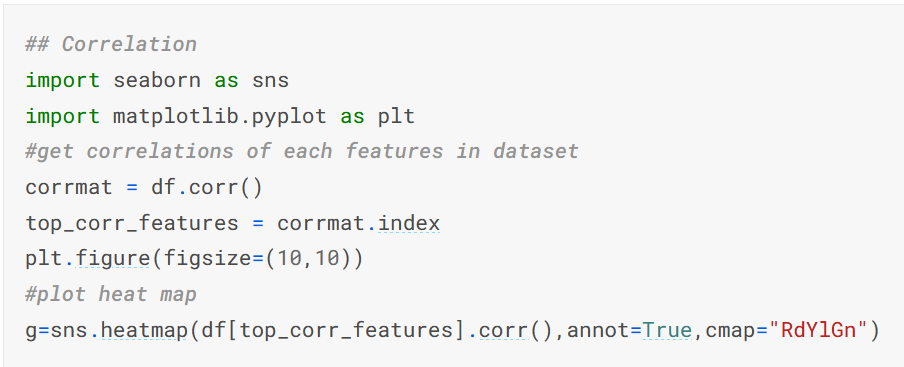
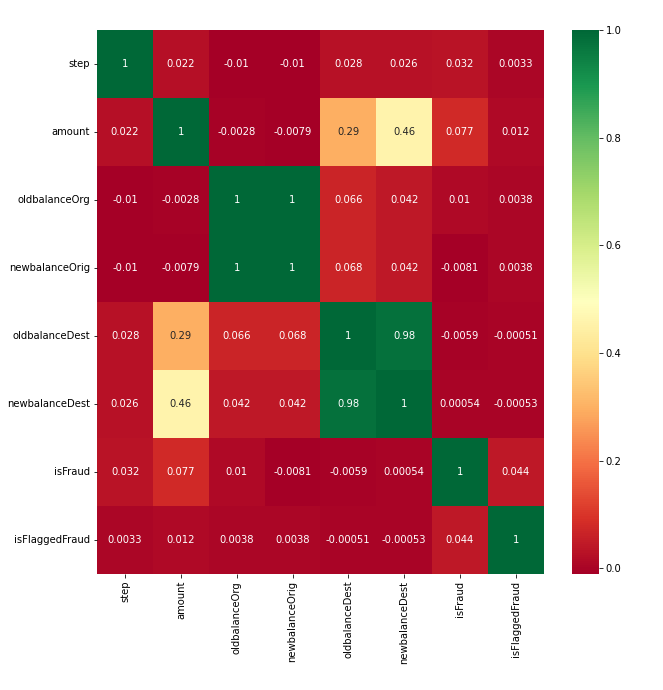

**Usage:** a graphical representation of data using colors where more commonly correlated values are represented by brighter colors (basically reddish colors) and darker colors for less commonly correlated values or activity values.

**Advantage:** Can show correlation between variables with the use of colors, making it easier for users to view. Time data can also be used to create this. 

**Disadvantage:** Big difference between normalized and un-normalized data (left = un-normalized; right = normalized)
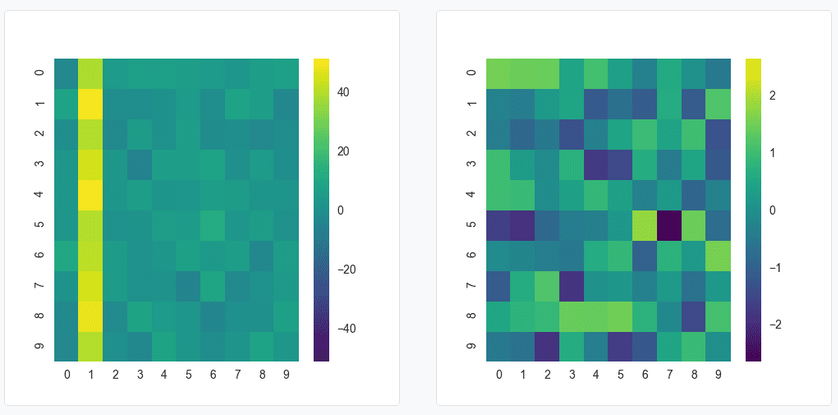

2. Label Encoder
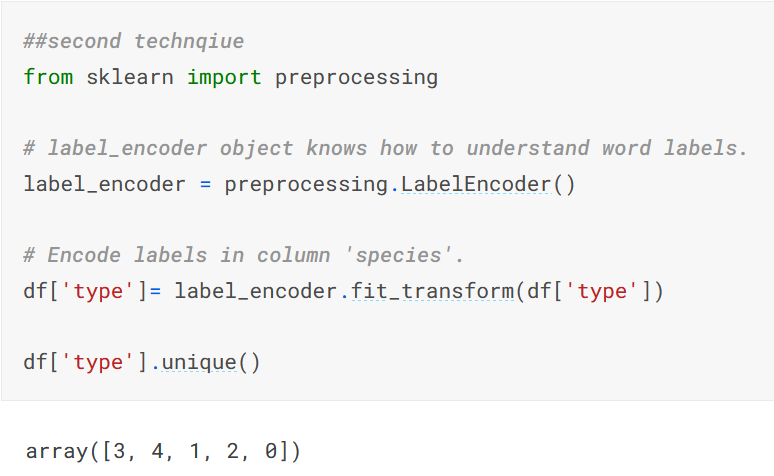

*library docs*:
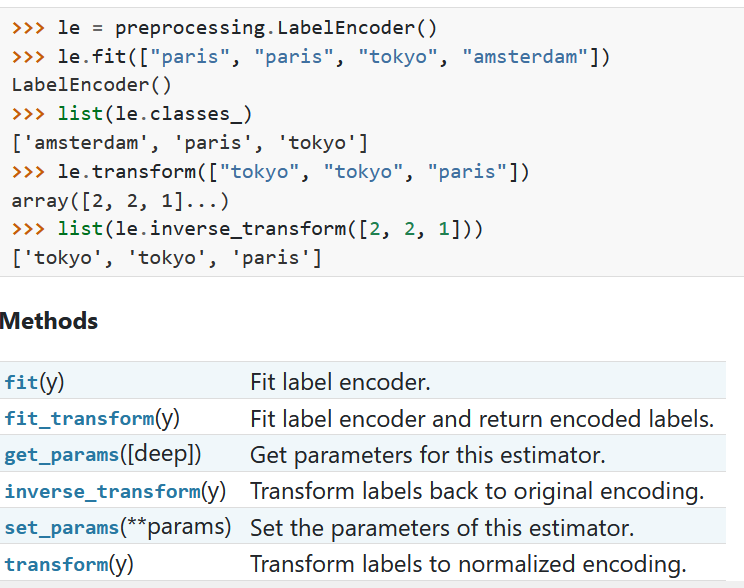

**Usage**: Used to encode non-numerical data into numerical values, if they are hashable and comparable.

**Advantage:** May allow a quicker way to create dummy variables.

**Disadvantage:** Will still need to directly specify the non-numerical variables to input into the encoder, though doing so by searching for dtype=object could suffice.

3. KNN Extra Tree Regressor
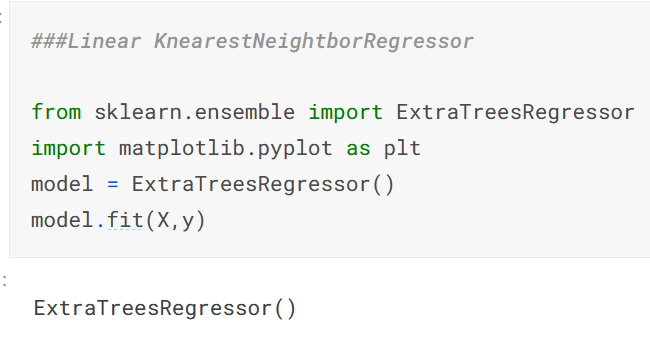

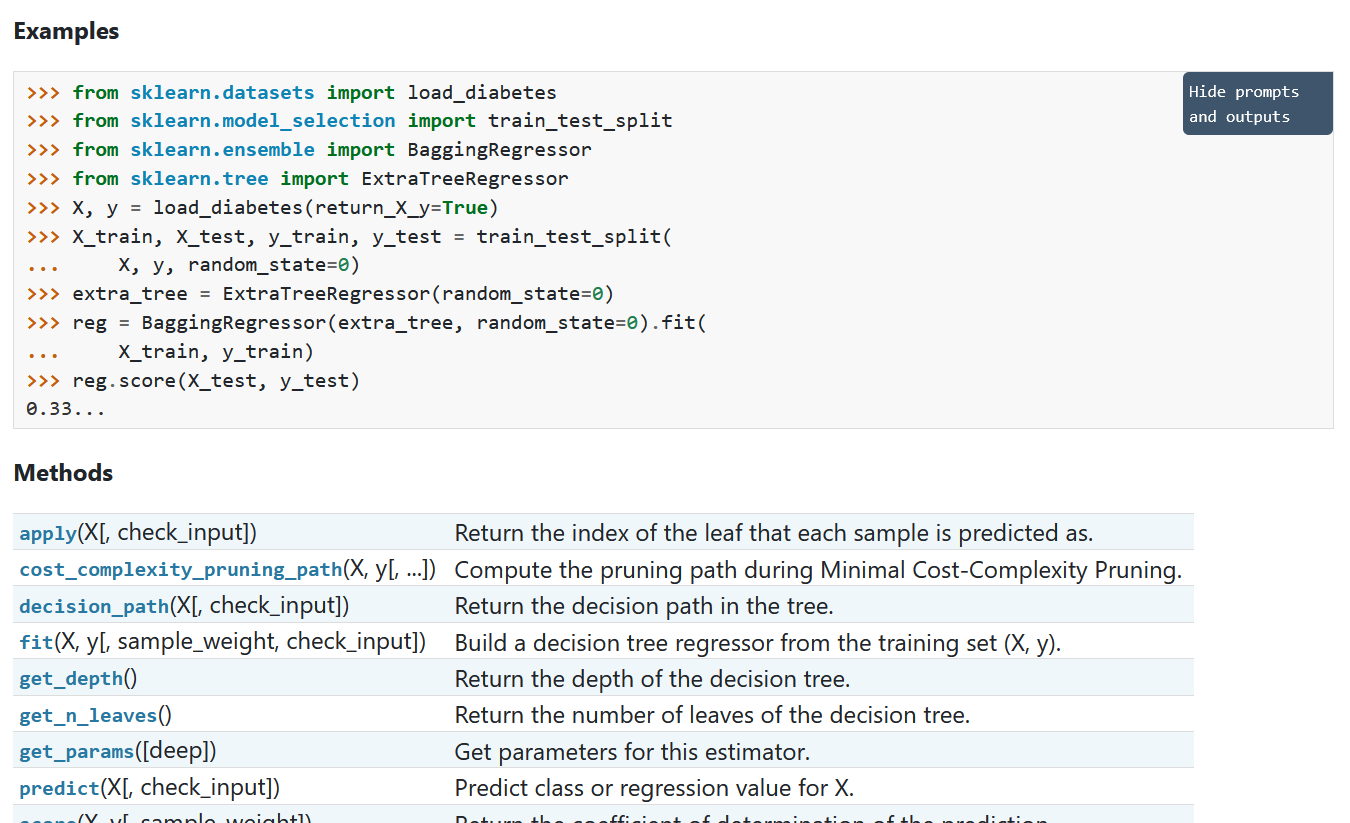

**Usage**: Different from regular decision tree; randomly splits samples of a node's max features into two groups and selects the best split to make a random decision tree.

**Advantage:** Split is more closely correlated to the structure of the data itself, rather than the user splitting it manually. Creates a more accurate model for prediction.

**Disadvantage:** Splitter methods are either "random" or "best", which can cause confusion for the user as random is the best *random* split and best is the best *overall* split. 

**Sources:**
- https://www.python-graph-gallery.com/heatmap/
- https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
- https://pythonbasics.org/seaborn-heatmap/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html

**2. List out at least three ways how this data report can be improved.  15 points**

1. The report could put reasoning for why they have selected certain techniques, such as why using a heatmap as opposed to a regular correlation matrix.
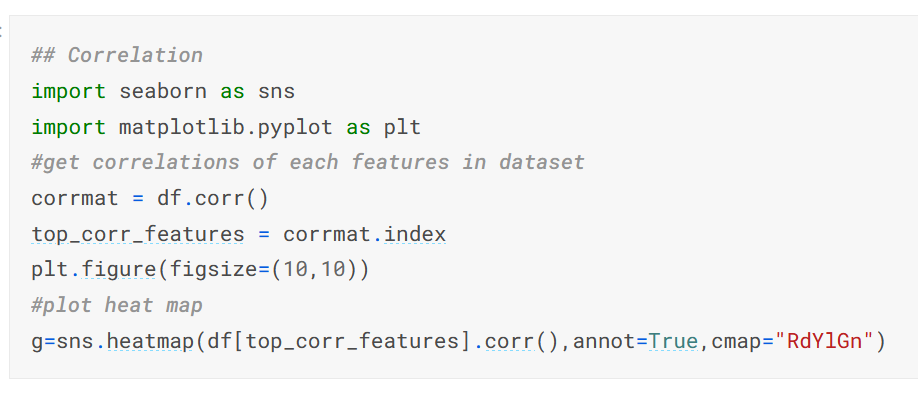

2. No explanation of why the KNN algorithm is selected or how the algorithm works
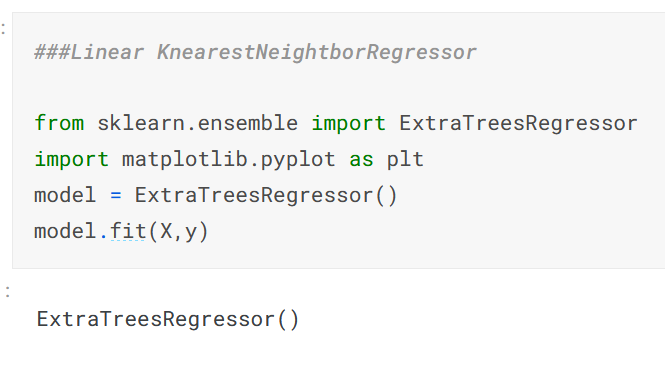

3. Explanation for dropping columns, for example, here two of the object-type columns are dropped but others are kept without explanation.
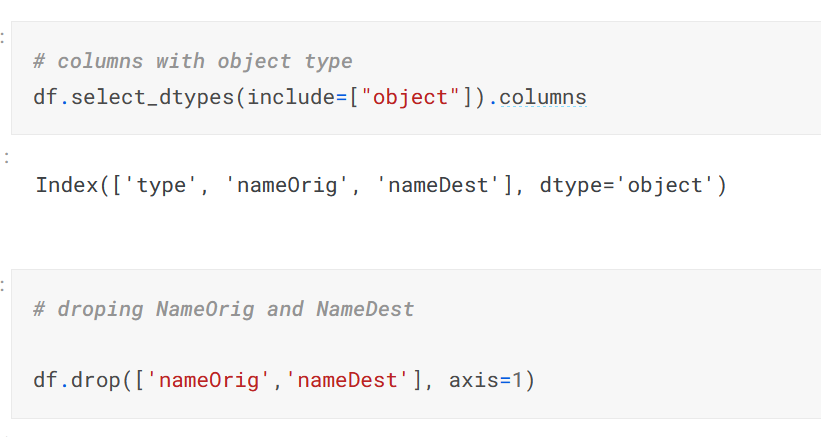

### My Prediction Model
**3. Build your own prediction model with the data cleaning pipeline and algorithms we have learned. Garbage in, garbage out. Also make sure you take all the necessary steps of data cleaning and feature engineering before you apply the prediction algorithm. Missing any necessary steps would be deducted 3-5 points. 30 points**

**Choose a correct prediction algorithm to build the model. 10 points**

**Evaluate the model with accuracy score and F1 scores.  Make sure the scores are over 70% to claim it as a good prediction model.  10 points**

*(NOTE: The main purpose of this project is to help you continue to learn new data analytics techniques. If you select a data report on a dataset that was used in our previous assignments, you can incorporate the new techniques learned from the report to improve your previous work. Evaluate whether the accuracy is better or not and explain why. If you select a dataset that was not used before, you can build your own prediction model and compare it with the author's. Evaluate whether your accuracy is better than the other author's and explain why. When you apply the new techniques or algorithms, make sure that you fully understand them and that they fit your data.)*

#### Goal
My goal is to evaluate relevant features to determine the probability of a transaction actually being fraud. I will evaluate the data and create a model that predicts whether the transaction is actually fraud, therefore the target variable will be isFraud.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Feature Selection

In [2]:
# determine if there is enough data to create a machnine learning model
df.shape

(6362620, 11)

In [3]:
# check all data types to determine if any dummy variables are needed 
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
# check for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# drop unnecessary columns
to_drop = ['step', 'nameOrig', 'nameDest', 'isFlaggedFraud']
df_new = df.drop(to_drop, axis=1)
print(df_new.columns.tolist())

['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


**Encode the Type Column**

In [6]:
# we will use the LabelEncoder library to turn the 'type' column values into numbers
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print("\033[1m" + "Before:" + "\033[0m")
print(df_new['type'].value_counts())

df_new['type']= label_encoder.fit_transform(df_new['type'])

# verify the change
print('\n')
print("\033[1m" + "After:" + "\033[0m")
print(df_new['type'].value_counts())

Before:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


After:
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64


**Get Rid of Duplicate Transactions**

In [7]:
print("\033[1m" + "Before:" + "\033[0m")
print(df_new.shape)

print('\n')
df_nodup = df_new.drop_duplicates(ignore_index=True)
print("\033[1m" + "After:" + "\033[0m")
print(df_nodup.shape)

Before:
(6362620, 7)


After:
(6264740, 7)


In [8]:
new_df = df_nodup.rename(columns={'isFraud':'target'})
new_df.columns.tolist()

['type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'target']

#### Feature Scaling

In [46]:
#ANOVA Test
from sklearn.feature_selection import SelectKBest, f_classif, chi2
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
x = new_df.loc[:, cols]
y = new_df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
np.set_printoptions(suppress=True)

print("\033[1m" + "F-Scores:" + "\033[0m")
for x,y in zip(FeaturesS.scores_, cols):
    print(x, y, '\n')

print("\033[1m" + "P-Values:" + "\033[0m")
for a,b in zip(FeaturesS.pvalues_, cols):
        print(a, b, '\n')

F-Scores:
33766.8551169023 amount 

544.1935358098244 oldbalanceOrg 

428.4342733848136 newbalanceOrig 

226.03759433349802 oldbalanceDest 

0.20974197276372328 newbalanceDest 

P-Values:
0.0 amount 

2.3350444251739366e-120 oldbalanceOrg 

3.588108881198916e-95 newbalanceOrig 

4.3692058898990076e-51 oldbalanceDest 

0.6469697343445999 newbalanceDest 



**High F-Scores**
- amount
- oldbalanceOrg
- newbalanceOrig

**P-Value < 0.05**
- amount
- oldbalanceOrg
- newbalanceOrig
- oldbalanceDest

In [50]:
#chi^2 test
column = ['type']
x_cat = new_df.loc[:, column]
y_cat = new_df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x_cat, y_cat)

print("\033[1m" + "Chi^2 Score:" + "\033[0m")
print(catFeatures.scores_)
print('\n')
    
print("\033[1m" + "P-Values:" + "\033[0m")
print(catFeatures.pvalues_)

Chi^2 Score:
[3184.0878239]


P-Values:
[0.]


Type has a high Chi^2 score, while having a p-value less than the threshold of 0.05, therefore it is a good feature to keep.

From the above evaluation, we should look into dropping the feature newbalanceDest. Let's double check with correlation matrix.

<AxesSubplot:>

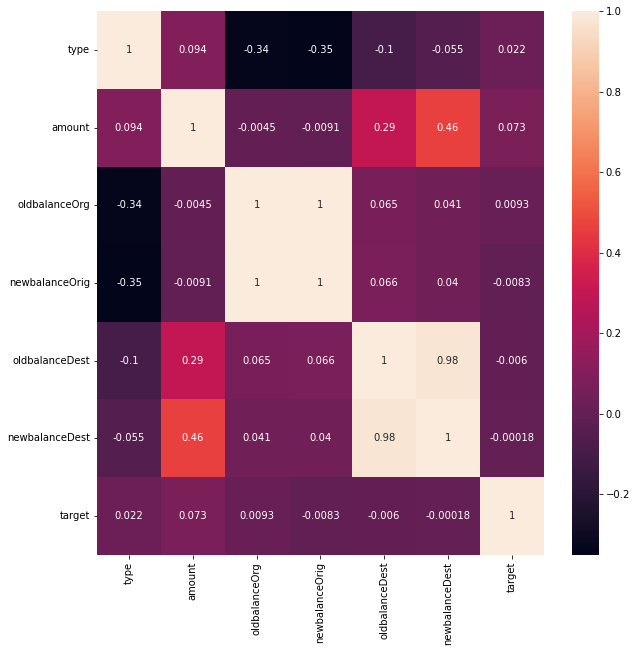

In [52]:
corr = new_df.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))

sns.heatmap(new_df[corr_features].corr(), annot=True)

**Features w/ High Corr. to Each Other**
- newbalanceDest -> oldbalanceDest
- oldbalanceDest -> newbalanceDest

From these observations, it will be decided to drop newbalanceDest, since this has a low F-score and high p-value.

In [64]:
new_df1 = new_df.drop('newbalanceDest', axis=1)
new_df1.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'target'],
      dtype='object')>

#### Evaluate the Balance of the Data

In [65]:
from collections import Counter
x = new_df.loc[:, new_df.columns!='target']
y = new_df['target']

# library to show number cases in a binary dataset
counter = Counter(y)
print(counter)

Counter({0: 6256588, 1: 8152})


Here, we have identified an issue with this dataset - this set is **heavily imbalanced**. There are over 6 million negative cases relative to the target variable, while there are only a little over 8,000 positive cases. This creates an issue in some machine learning algorithms in that the prediction model is created with skewed data, which could result in a low-performing model. In other words, the prediction of the model will not be accurate and its evaluation scores will be low.

We will need to **undersample** the data in order to balance the dataset - this entails removing some of the majority data, resulting in value counts that are closer to that of the minority data. However, this *may* cause some issue when it comes to removing *too much* data. 

Since we are concerned with how much data is removed with undersampling, we will use a specific undersampling SMOTE technique: **One-Sided Selection**: this is a combination of two imbalanced-learning undersampling libraries, the Condensed Nearest-Neighbor and Tomek Links. The **Tomek Link** technique is first applied to evaluate each data point and picks out those of different classes that are close in distance (ie, a point from the negative fraud category has a nearest neighbor that is a positive case) with no other nearest neighbors of the same class nearby - these cases are categorized as 'ambiguous', and the majority point is removed. Next, the **Condensed Nearest-Neighbor** technique is used to remove majority-category data points that are far in distance from the decision boundary. 

*Distance refers to Euclidean Distance formula*

Sources:
[Undersampling Algorithms for Imbalanced Classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)
[Imbalanced Classification in Python: SMOTE-Tomek Links Method](https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

#### Balance the Data

In [66]:
from collections import Counter
from imblearn.under_sampling import OneSidedSelection
x = new_df.loc[:, new_df.columns!='target']
y = new_df['target']

# library to show number cases in a binary dataset - this is before undersampling
print("\033[1m" + "Data Shape Before Balance:" + "\033[0m")
counter = Counter(y)
print(counter)

Data Shape Before Balance:
Counter({0: 6256588, 1: 8152})


In [67]:
# the undersampling algorithm
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=100)
x_under, y_under = undersample.fit_resample(x, y)

print("\033[1m" + "Data Shape After Balance:" + "\033[0m")
counter = Counter(y_under)
print(counter)

Data Shape After Balance:
Counter({0: 2523382, 1: 8152})


#### Build the Prediction Model

**Algorithm: Naive Bayes Classifier**

- I am using this algorithm because I would like to discover the probability for a transaction being fraud based on the information about the transaction specified. This algorithm is also used for large amounts of binary or multi-class data. 

Sources:
- [Top Machine Learning Algorithms for Classification](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)
- [Naive Bayes for Machine Learning](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)

In [68]:
from sklearn.model_selection import train_test_split
# split the data into testing and training - 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)

(2025227, 6)
(2025227,)


In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

#### Evaluate the Model

In [70]:
from sklearn.metrics import classification_report
print("\033[1m" + "GNB Model Evaluation:" + "\033[0m")
print(classification_report(y_test, y_pred))

GNB Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    504707
           1       0.02      0.12      0.03      1600

    accuracy                           0.97    506307
   macro avg       0.51      0.55      0.51    506307
weighted avg       0.99      0.97      0.98    506307



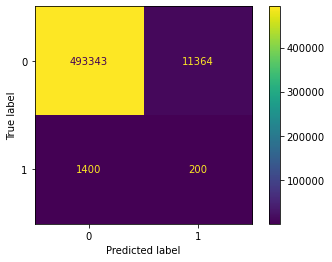

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gnb, x_test, y_test)

#### Conclusion
Based on the report, it seems that the model has a 98% accuracy, which means that this model can do well in predicting probability that a transaction will or will not be fraudulent.